## Covid city preparedness index

This notebook shows how the Covid city preparedness index is calculated based on data from hex bins in several mexican metropolitan areas.

### Import modules

In [1]:
import os
import sys
import pandas as pd
import geopandas as gpd
import numpy as np
import math
import matplotlib.pyplot as plt
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
%matplotlib inline

#### Tests the access to a single city gdf and caculates the index

In [2]:
gdf = gpd.read_file('../data/processed/Aguascalientes_hex_bins.geojson')
gdf = gdf.loc[(gdf['dist_supermercados'] > 0)]
gdf_filter = gdf[['pobtot','dist_supermercados','dist_farmacias','dist_hospitales','geometry']].copy()

In [3]:
gdf_filter['ind_supermercado0'] = gdf_filter.apply (lambda row: 1 / (1 + math.exp( 0.00627778 * (row.loc['dist_supermercados'] - 650 ))), axis=1)
gdf_filter['ind_farmacias0'] = gdf_filter.apply (lambda row: 1 / (1 + math.exp( 0.00627778 * (row.loc['dist_farmacias'] - 650 ))), axis=1)
gdf_filter['ind_hospitales'] = gdf_filter.apply (lambda row: 1 / (1 + math.exp( 0.00109861 * (row.loc['dist_hospitales'] - 3000 ))), axis=1)
gdf_filter['ind_accesibilidad0'] = gdf_filter.apply (lambda row: (0.333*row.loc['ind_supermercado0']) + (0.334*row.loc['ind_farmacias0']) + (0.333*row.loc['ind_hospitales']), axis=1)

#### Analyze the index results

In [8]:
gdf_filter.head(5)

,pobtot,dist_supermercados,dist_farmacias,dist_hospitales,geometry,ind_hospitales,ind_supermercado,ind_farmacias,ind_accesibilidad
0,398.986753,509.233837,209.944628,473.581326,"POLYGON ((-100.40181 20.57831, -100.40264 20.5...",0.941340,7.075882e-01,9.406194e-01,0.863260
1,292.959184,572.672222,474.344222,3825.985111,"POLYGON ((-100.46397 20.53316, -100.46522 20.5...",0.287525,6.190332e-01,7.507710e-01,0.552641
2,0.000000,3509.067333,4590.333333,9607.037333,"POLYGON ((-100.30321 20.49311, -100.30238 20.4...",0.000704,1.603334e-08,1.807402e-11,0.000234
6,0.000000,5431.323250,2079.017500,5589.903250,"POLYGON ((-100.40185 20.73240, -100.39978 20.7...",0.054925,9.208213e-14,1.270176e-04,0.018332
7,444.780220,239.293588,482.307412,1951.419235,"POLYGON ((-100.38938 20.62842, -100.39063 20.6...",0.759873,9.294535e-01,7.413002e-01,0.810140


In [5]:
gdf_filter.sort_values(by='dist_supermercados').head(1)

,pobtot,dist_supermercados,dist_farmacias,dist_hospitales,geometry,ind_supermercado0,ind_farmacias0,ind_hospitales,ind_accesibilidad0
5916,525.926136,47.92925,138.765,1127.501292,"POLYGON ((-102.29481 21.88076, -102.29568 21.8...",0.977679,0.961187,0.886668,0.941864


In [6]:
gdf_filter.sort_values(by='dist_farmacias').head(1)

,pobtot,dist_supermercados,dist_farmacias,dist_hospitales,geometry,ind_supermercado0,ind_farmacias0,ind_hospitales,ind_accesibilidad0
5272,0.0,2347.546,0.0,5105.5,"POLYGON ((-102.21360 21.86310, -102.21447 21.8...",0.000024,0.983383,0.090042,0.358442


In [7]:
gdf_filter.sort_values(by='dist_hospitales').head(1)

,pobtot,dist_supermercados,dist_farmacias,dist_hospitales,geometry,ind_supermercado0,ind_farmacias0,ind_hospitales,ind_accesibilidad0
980,11.566038,378.12925,953.6455,133.60725,"POLYGON ((-102.28696 21.83533, -102.28820 21.8...",0.846414,0.129406,0.958871,0.644381


#### Evaluate the inclusion of other ways to calculate the index, normal mean, mean for hex bins with population > 0, and weighted mean

In [8]:
media_a = gdf_filter.ind_accesibilidad0.mean()
media_a_pob = gdf_filter[gdf_filter['pobtot']>0].ind_accesibilidad0.mean()

pobtot = gdf_filter.pobtot.sum()

gdf_filter['w0'] = gdf_filter.ind_accesibilidad0 * gdf_filter.pobtot

gdf_filter['ind_acc_media_pond0'] = gdf_filter.w0 / pobtot

media_pond = gdf_filter.ind_acc_media_pond0.sum()

In [9]:
gdf_city = pd.DataFrame(columns=['city','ind_acc0','ind_acc_pond0','ind_acc1','ind_acc_pond1','ind_acc2','ind_acc_pond2'])
gdf_city

,city,ind_acc0,ind_acc_pond0,ind_acc1,ind_acc_pond1,ind_acc2,ind_acc_pond2


#### Tests the access to city names based on iteration over files in folder

In [10]:
dir_gdf = '../data/processed/'

for f in os.listdir(dir_gdf):
    
    if '_hex_bins' in f:
        
        print (f[0:f.find('_')])
        #print (f.find('-'))

Laguna
Cuernavaca
Toluca
Aguascalientes
Mexicali
Merida
Saltillo
Monterrey
SLP
Mexico
Puebla
Guadalajara
Querétaro


### [OUTDATED] Calculate index based on different penalties for distance to services

In [5]:
dir_gdf = '../data/processed/'

i = 0

#create new df
gdf_city = pd.DataFrame(columns=['city','ind_acc0', 'ind_acc_pob0','ind_acc_pond0',
                                 'ind_acc1','ind_acc_pob1','ind_acc_pond1',
                                 'ind_acc2','ind_acc_pob2','ind_acc_pond2'])

for f in os.listdir(dir_gdf):
    
    #only uses files that contain _hex_bins
    if '_hex_bins' in f:
        
        #gets city name
        city = (f[0:f.find('_')])
        
        print (city)
        
        #access and filter data
        gdf = gpd.read_file(dir_gdf+f)
        gdf = gdf.loc[(gdf['dist_supermercados'] > 0)]
        gdf_filter = gdf[['pobtot','dist_supermercados','dist_farmacias','dist_hospitales','geometry']].copy()
        
        #removes big distance values to avoid errors
        gdf_filter['dist_supermercados'] = gdf_filter['dist_supermercados'].apply(lambda x: x if x <= 10000 else 10000)
        gdf_filter['dist_farmacias'] = gdf_filter['dist_farmacias'].apply(lambda x: x if x <= 10000 else 10000)
        
        #calculate index
        #hospital index
        gdf_filter['ind_hospitales'] = gdf_filter.apply (lambda row: 1 / (1 + math.exp( 0.00109861 * (row.loc['dist_hospitales'] - 3000 ))), axis=1)
        
        
        #index0
        gdf_filter['ind_supermercado0'] = gdf_filter.apply (lambda row: 1 / (1 + math.exp( 0.00627778 * (row.loc['dist_supermercados'] - 650 ))), axis=1)
        gdf_filter['ind_farmacias0'] = gdf_filter.apply (lambda row: 1 / (1 + math.exp( 0.00627778 * (row.loc['dist_farmacias'] - 650 ))), axis=1)
        gdf_filter['ind_accesibilidad0'] = gdf_filter.apply (lambda row: (0.333*row.loc['ind_supermercado0']) + (0.334*row.loc['ind_farmacias0']) + (0.333*row.loc['ind_hospitales']), axis=1)
        
        print ('check 0')
        
        #index1
        gdf_filter['ind_supermercado1'] = gdf_filter.apply (lambda row: 1 / (1 + math.exp( 0.00439445 * (row.loc['dist_supermercados'] - 500 ))), axis=1)
        gdf_filter['ind_farmacias1'] = gdf_filter.apply (lambda row: 1 / (1 + math.exp( 0.00627778 * (row.loc['dist_farmacias'] - 650 ))), axis=1)
        gdf_filter['ind_accesibilidad1'] = gdf_filter.apply (lambda row: (0.333*row.loc['ind_supermercado1']) + (0.334*row.loc['ind_farmacias1']) + (0.333*row.loc['ind_hospitales']), axis=1)
        
        print ('check 1')
        
        #index2
        gdf_filter['ind_supermercado2'] = gdf_filter.apply (lambda row: 1 / (1 + math.exp( 0.00439445 * (row.loc['dist_supermercados'] - 500 ))), axis=1)
        gdf_filter['ind_farmacias2'] = gdf_filter.apply (lambda row: 1 / (1 + math.exp( 0.00439445 * (row.loc['dist_farmacias'] - 500 ))), axis=1)
        gdf_filter['ind_accesibilidad2'] = gdf_filter.apply (lambda row: (0.333*row.loc['ind_supermercado2']) + (0.334*row.loc['ind_farmacias2']) + (0.333*row.loc['ind_hospitales']), axis=1)
        
        print ('check 2')
        
        #calculate means
        #pobtot
        pobtot = gdf_filter.pobtot.sum()

        #index0
        media_a0 = gdf_filter.ind_accesibilidad0.mean()
        media_a_pob0 = gdf_filter[gdf_filter['pobtot']>0].ind_accesibilidad0.mean()

        gdf_filter['w0'] = gdf_filter.ind_accesibilidad0 * gdf_filter.pobtot

        gdf_filter['ind_acc_media_pond0'] = gdf_filter.w0 / pobtot

        media_pond0 = gdf_filter.ind_acc_media_pond0.sum()
        
        #index1
        media_a1 = gdf_filter.ind_accesibilidad1.mean()
        media_a_pob1 = gdf_filter[gdf_filter['pobtot']>0].ind_accesibilidad1.mean()

        gdf_filter['w1'] = gdf_filter.ind_accesibilidad1 * gdf_filter.pobtot

        gdf_filter['ind_acc_media_pond1'] = gdf_filter.w1 / pobtot

        media_pond1 = gdf_filter.ind_acc_media_pond1.sum()
        
        #index2
        media_a2 = gdf_filter.ind_accesibilidad2.mean()
        media_a_pob2 = gdf_filter[gdf_filter['pobtot']>0].ind_accesibilidad2.mean()

        gdf_filter['w2'] = gdf_filter.ind_accesibilidad2 * gdf_filter.pobtot

        gdf_filter['ind_acc_media_pond2'] = gdf_filter.w2 / pobtot

        media_pond2 = gdf_filter.ind_acc_media_pond2.sum()
        
        #add data to df
        
        gdf_city.loc[i] = [city, media_a0, media_a_pob0, media_pond0,
                           media_a1, media_a_pob1, media_pond1,
                           media_a2, media_a_pob2, media_pond2]
        
        i += 1

Laguna


KeyboardInterrupt: 

In [13]:
gdf_city

,city,ind_acc0,ind_acc_pob0,ind_acc_pond0,ind_acc1,ind_acc_pob1,ind_acc_pond1,ind_acc2,ind_acc_pob2,ind_acc_pond2
0,Laguna,0.290679,0.599740,0.740344,0.268661,0.553390,0.686714,0.251316,0.516063,0.636098
1,Cuernavaca,0.375310,0.502817,0.619649,0.349588,0.467671,0.575664,0.323933,0.431693,0.529637
2,Toluca,0.240597,0.487547,0.641815,0.226381,0.456200,0.598376,0.209568,0.418025,0.547739
3,Aguascalientes,0.273947,0.614859,0.728603,0.251341,0.565159,0.671983,0.234459,0.523535,0.619616
4,Mexicali,0.185352,0.522136,0.635091,0.169388,0.475955,0.580848,0.158134,0.441214,0.535674
5,Merida,0.307317,0.539513,0.665150,0.281105,0.492565,0.609653,0.262592,0.457171,0.561418
6,Saltillo,0.304020,0.543941,0.703395,0.278703,0.499097,0.648764,0.260293,0.465598,0.598987
7,Monterrey,0.385093,0.600375,0.760070,0.355120,0.554093,0.705712,0.333899,0.518840,0.655420
8,SLP,0.305028,0.582482,0.744168,0.282635,0.539904,0.689841,0.263375,0.501445,0.635753
9,Mexico,0.604534,0.695603,0.808848,0.566343,0.651201,0.756255,0.524605,0.602922,0.704757


### [CURRENT] Calculate index for accesability to hospitals, farmacies and supermarkets

In [9]:
dir_gdf = '../data/processed/'

i = 0

#create new df
gdf_city = pd.DataFrame(columns=['city','ind_acc', 'ind_acc_pob'])

for f in os.listdir(dir_gdf):
    
    #only uses files that contain _hex_bins
    if '_hex_bins' in f:
        
        #gets city name
        city = (f[0:f.find('_')])
        
        print (city)
        
        #access and filter data
        gdf = gpd.read_file(dir_gdf+f)
        gdf = gdf.loc[(gdf['dist_supermercados'] > 0)]
        gdf_filter = gdf[['pobtot','dist_supermercados','dist_farmacias','dist_hospitales','geometry']].copy()
        
        #removes big distance values to avoid errors
        gdf_filter['dist_supermercados'] = gdf_filter['dist_supermercados'].apply(lambda x: x if x <= 10000 else 10000)
        gdf_filter['dist_farmacias'] = gdf_filter['dist_farmacias'].apply(lambda x: x if x <= 10000 else 10000)
        
        #calculate index
        #hospital index
        gdf_filter['ind_hospitales'] =  gdf_filter.apply (lambda row: 1 / (1 + math.exp( 0.00109861 * (row.loc['dist_hospitales'] - 3000 ))), axis=1)
        gdf_filter['ind_supermercado'] = gdf_filter.apply (lambda row: 1 / (1 + math.exp( 0.00627778 * (row.loc['dist_supermercados'] - 650 ))), axis=1)
        gdf_filter['ind_farmacias'] = gdf_filter.apply (lambda row: 1 / (1 + math.exp( 0.00627778 * (row.loc['dist_farmacias'] - 650 ))), axis=1)
        gdf_filter['ind_accesibilidad'] = gdf_filter.apply (lambda row: (0.333*row.loc['ind_supermercado']) + (0.334*row.loc['ind_farmacias']) + (0.333*row.loc['ind_hospitales']), axis=1)
        
        
        #calculate means
        #index
        media_a = round(gdf_filter.ind_accesibilidad.mean(),2)
        media_a_pob = round(gdf_filter[gdf_filter['pobtot']>0].ind_accesibilidad.mean(),2)
        
        
        #add data to df
        
        gdf_city.loc[i] = [city, media_a, media_a_pob]
        
        i += 1

Laguna
Cuernavaca
Toluca
Aguascalientes
Mexicali
Merida
Saltillo
Monterrey
SLP
Mexico
Puebla
Guadalajara
Querétaro


### Heatmap to visualize data

In [10]:
gdf_city.set_index('city', inplace=True)

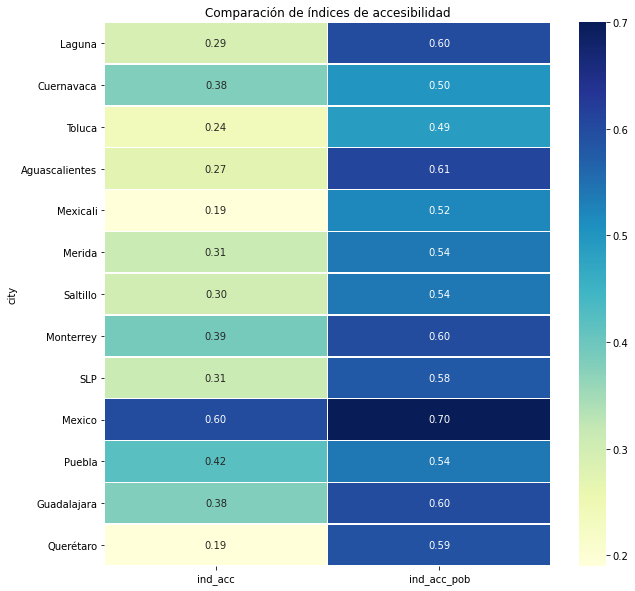

In [14]:
import seaborn as sns

fig, ax = plt.subplots(1,1,figsize=(10,10))

ax = sns.heatmap(gdf_city[['ind_acc','ind_acc_pob']], annot=True, cmap = "YlGnBu", linewidths=0.5, fmt='.2f')
plt.title('Comparación de índices de accesibilidad')
plt.show()


### Lollipop graph to visualize data

In [15]:
gdf_city.reset_index(inplace=True)

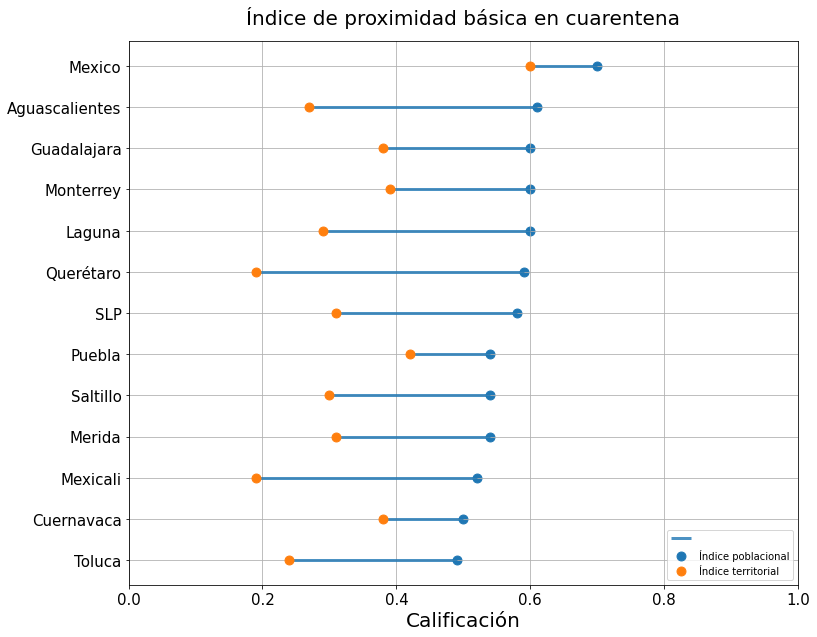

In [17]:
#import seaborn as sns

gdf_city.sort_values(by='ind_acc_pob', inplace=True)

fig = plt.figure(figsize=(12,10))

my_range=range(0,len(gdf_city))

plt.hlines(y=gdf_city['city'], xmin=gdf_city['ind_acc'], xmax=gdf_city['ind_acc_pob'],linewidth=3, alpha =0.8)

plt.scatter(gdf_city['ind_acc_pob'], my_range, s=80, alpha=1)

plt.scatter(gdf_city['ind_acc'], my_range, s=80, alpha=1, zorder=2)

plt.title("Índice de proximidad básica en cuarentena", fontsize=20, x=0.5,y=1.02)

plt.xlabel('Calificación', fontsize=20)

plt.ylabel('',fontsize=20)

plt.yticks(fontsize=15)

plt.xticks(fontsize=15)

plt.grid()

plt.xlim(left=0, right=1) 

plt.legend(['', 'Índice poblacional', 'Índice territorial'], loc='lower right')

plt.savefig('../output/figures/Índice_Proximidad.png',dpi=300,bbox_inches='tight')
plt.savefig('../output/figures/Índice_Proximidad.svg',dpi=300,bbox_inches='tight') 